# **Identificar dentre os dados apresentados um padrão de possíveis inadimplências afim de trata-las previamente.**


Importação dos dados

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset= pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values='na')
dataset.head(10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


Exploração dos dados

In [4]:
print(dataset.shape)
print(dataset[dataset['default'] == 1].shape)
print(dataset[dataset['default'] == 0].shape)

(10127, 16)
(1627, 16)
(8500, 16)


Classificação dos dados, comparação em porcentagem de inadimplentes e adimplentes perante o total

In [5]:
qtd_linhas_total, _ = dataset.shape
qtd_linhas_inadimplentes, _ = dataset[dataset['default'] == 1].shape
qtd_linhas_adimplentes, _ = dataset[dataset['default'] == 0].shape

print(f'A porcentagem de clientes adimplentes é { round(100 * qtd_linhas_adimplentes / qtd_linhas_total, 2) }%')
print(f'A porcentagem de clientes inadimplentes é { round(100 * qtd_linhas_inadimplentes / qtd_linhas_total, 2) }%')

A porcentagem de clientes adimplentes é 83.93%
A porcentagem de clientes inadimplentes é 16.07%


Remoção de dados não necessários e limpeza de dados para melhorar a visualização/comparação

Verificamos que as colunas de valores estão formatadas no padrão brasileiro e não serão reconhecidas pelo phyton desta forma

In [8]:
dataset.dtypes


id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

Sendo assim vamos transformar estes dados para facilitar as comparações

In [13]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))
dataset['valor_transacoes_12m'] = dataset['valor_transacoes_12m'].apply(fn)
dataset['limite_credito'] = dataset['limite_credito'].apply(fn)

In [14]:
print(dataset[['limite_credito', 'valor_transacoes_12m']].dtypes)
print(dataset[['limite_credito', 'valor_transacoes_12m']].head(n=5))

limite_credito          float64
valor_transacoes_12m    float64
dtype: object
   limite_credito  valor_transacoes_12m
0        12691.51               1144.90
1         8256.96               1291.45
2         3418.56               1887.72
3         3313.03               1171.56
4         4716.22                816.08


Também encontramos uma gama de dados faltantes em certas colunas

In [16]:
dataset.isna().any()


id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

In [17]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

In [20]:
print('Dados faltantes e porcentagem no dataframe total:')
stats_dados_faltantes(df=dataset)

Dados faltantes e porcentagem no dataframe total:
{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [23]:
print('Dados faltantes e porcentagem no dataframe filtrando pelos Adimplentes:')
stats_dados_faltantes(df=dataset[dataset['default'] == 0])

Dados faltantes e porcentagem no dataframe filtrando pelos Adimplentes:
{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [25]:
print('Dados faltantes e porcentagem no dataframe filtrando pelos Inadimplentes:')
stats_dados_faltantes(df=dataset[dataset['default'] == 1])

Dados faltantes e porcentagem no dataframe filtrando pelos Inadimplentes:
{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


vamos removê-los a fim de facilitar as análises

In [26]:
print(dataset.shape)
dataset.dropna(inplace=True)
print(dataset.shape)

(10127, 16)
(7081, 16)


Faremos a mesma comparação de proporcionalidade entre os clientes adimplentes e Inadimplentes após a remoção dos dados faltantes

In [27]:
qtd_linhas_total, _ = dataset.shape
qtd_linhas_inadimplentes, _ = dataset[dataset['default'] == 1].shape
qtd_linhas_adimplentes, _ = dataset[dataset['default'] == 0].shape

print(f'A porcentagem de clientes adimplentes é { round(100 * qtd_linhas_adimplentes / qtd_linhas_total, 2) }%')
print(f'A porcentagem de clientes inadimplentes é { round(100 * qtd_linhas_inadimplentes / qtd_linhas_total, 2) }%')

A porcentagem de clientes adimplentes é 84.28%
A porcentagem de clientes inadimplentes é 15.72%


Visualização e comparação dos dados em gráficos

In [28]:
sns.set_style('whitegrid')

In [29]:
df_adimplente = dataset[dataset['default'] == 0]

In [30]:
df_inadimplente = dataset[dataset['default'] == 1]

Visualização das variáveis Categóricas

In [31]:
dataset.select_dtypes('object').head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


Define uma função para geração de grafico entre os 3 dataframes

In [51]:
def gera_grafico_tripo(dataframes: list, coluna: str, titulos: list):
  eixo = 0
  max_y = 0
  max = dataframes[0].select_dtypes('object').describe()[coluna]['freq'] * 1.1
  figura, eixos = plt.subplots(1,3, figsize=(20,5), sharex=True)

  for dataframe in dataframes:
    df_to_plot = dataframe[coluna].value_counts().to_frame()
    df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
    df_to_plot[coluna] = df_to_plot.index
    df_to_plot.sort_values(by=[coluna], inplace=True)
    df_to_plot.sort_values(by=[coluna])

    f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequencia Absoluta')
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    eixo += 1

  return figura


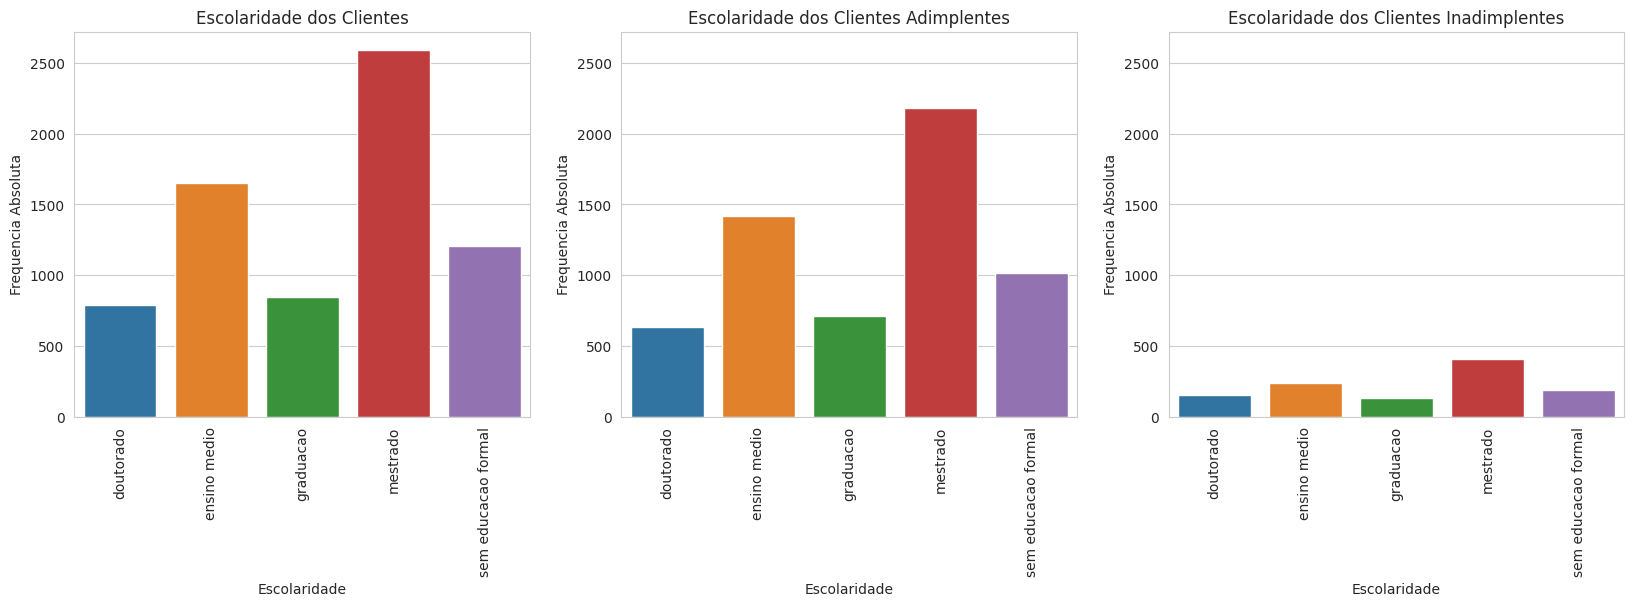

In [52]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

figura = gera_grafico_tripo(dataframes=[dataset, df_adimplente, df_inadimplente], coluna=coluna, titulos=titulos)
figura.show()

Podemos verificar na comparação dos gráficos que os dados de Escolaridade são proporcionais entre os clientes Adimplentes e Inadimplentes, assim sendo não podemos tirar um padrão de inadimplência utilizando esta coluna.

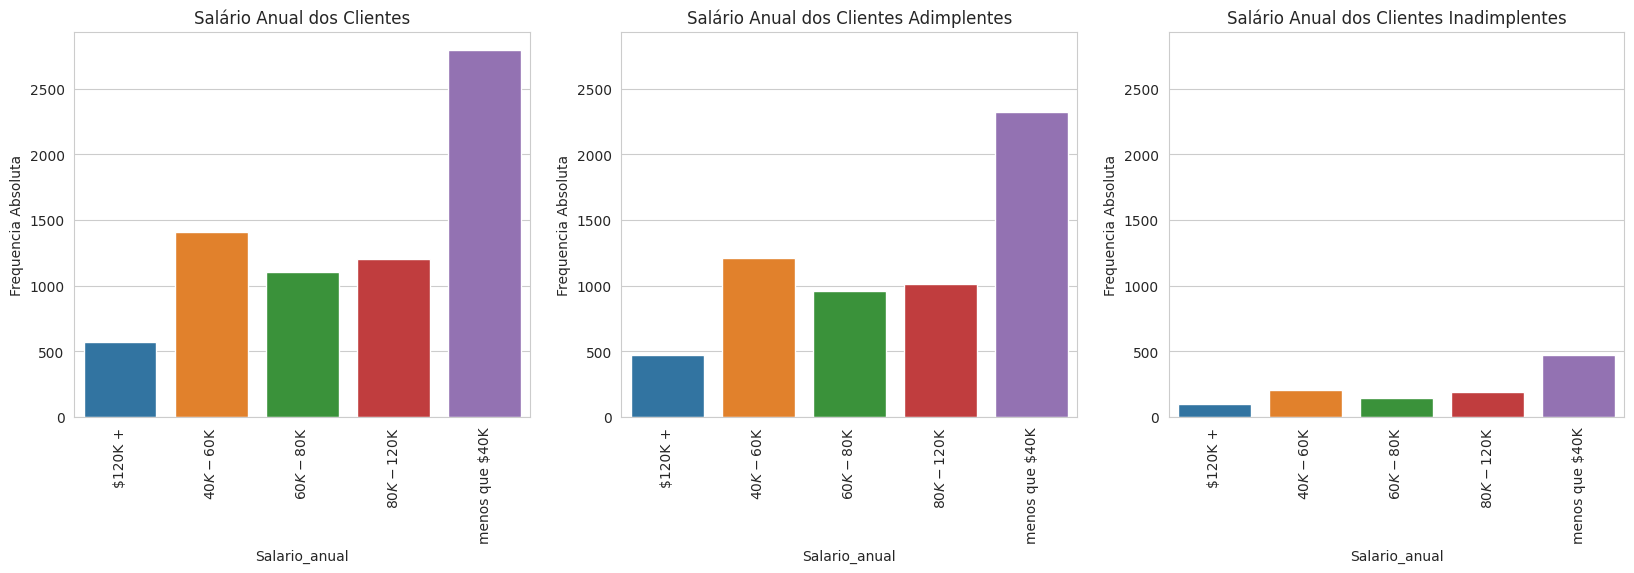

In [37]:
coluna = 'salario_anual'
titulos = ['Salário Anual dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']

figura = gera_grafico_tripo(dataframes=[dataset, df_adimplente, df_inadimplente], coluna=coluna, titulos=titulos)
figura.show()

Utilizando a coluna de Salário Anual também podemos ver uma proporcionalidade entre os clientes Adimplentes e Inadimplentes assim não podemos traçar um padrão de inadimplências.

Verificação das Variáveis Númericas

In [38]:
dataset.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


Cria uma função de geração de um gráfico no formato de Histograma

In [46]:
def gera_histo_grafico(dataframes: list, coluna: str, titulos: list):
  eixo = 0
  max_y = 0
  figura, eixos = plt.subplots(1, 3, figsize=(20,5), sharex=True)
  for dataframe in dataframes:
    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(),ylabel='Frequência Absoluta')

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0,max_y))

    eixo += 1
  return figura

Gerar um gráfico em formato de histograma da coluna de Quantidade de Transações nos ultimos 12 meses

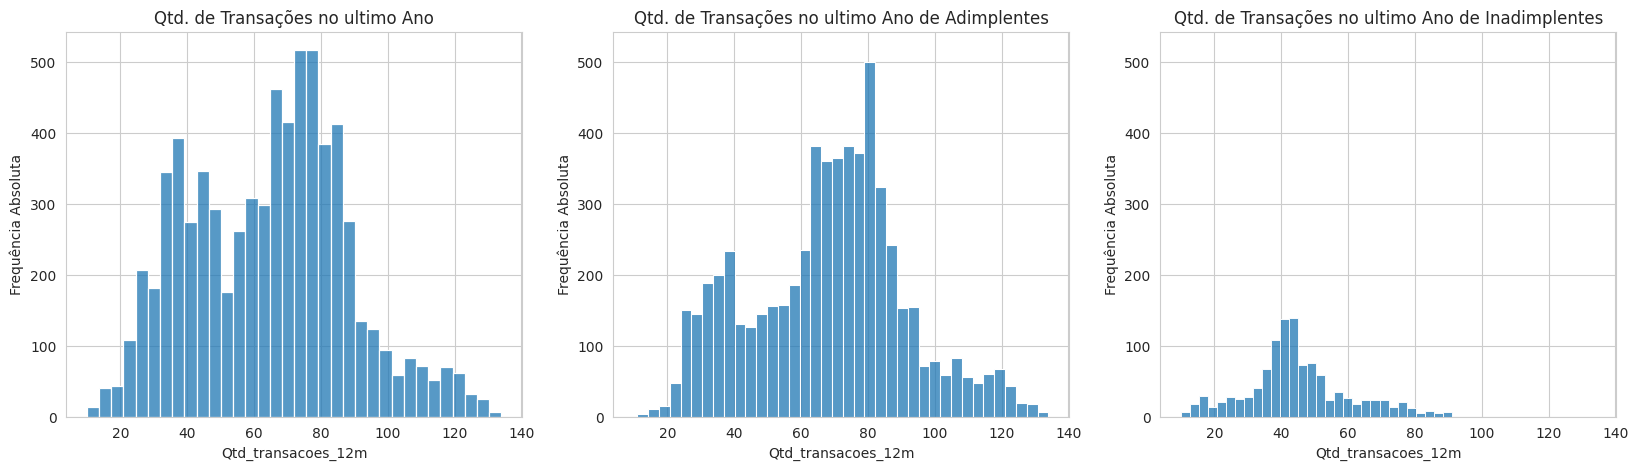

In [47]:
figura = gera_histo_grafico([dataset, df_adimplente, df_inadimplente],'qtd_transacoes_12m', ['Qtd. de Transações no ultimo Ano', 'Qtd. de Transações no ultimo Ano de Adimplentes', 'Qtd. de Transações no ultimo Ano de Inadimplentes'])
figura.show()

Identificamos aqui um padrão entre as quantidades de transações realizadas no último ano entre os clientes Inadimplentes que se destaca, o que pode nos ajudar a levar em consideração para traçar um comportamento dos clientes Inadimplentes.

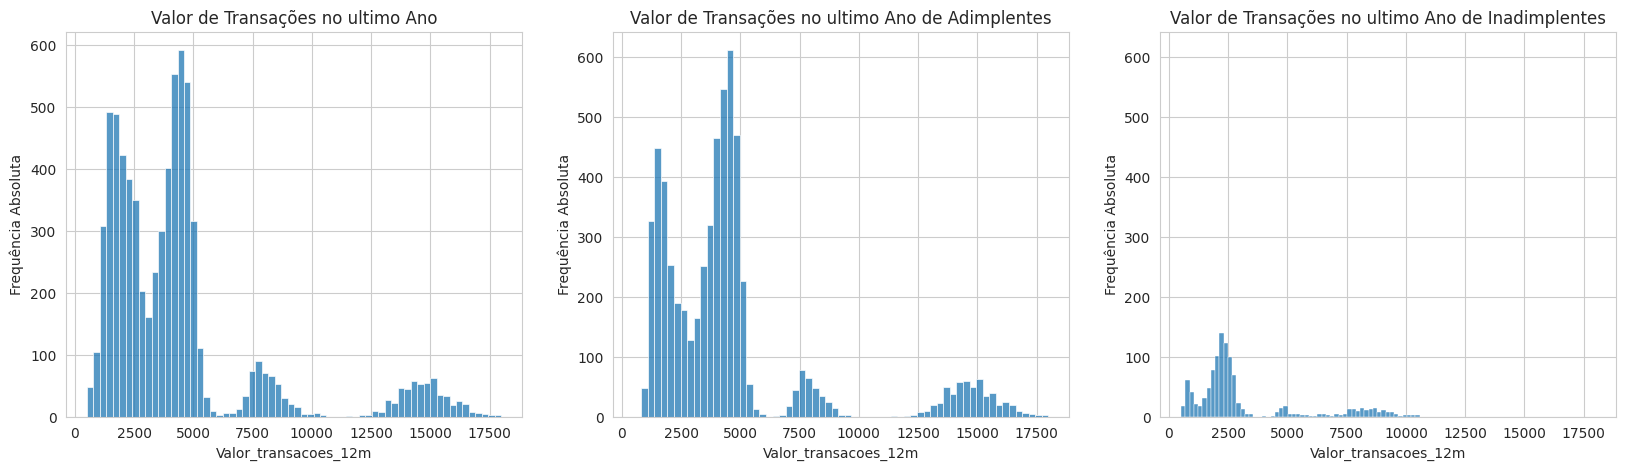

In [41]:
figura = gera_histo_grafico([dataset, df_adimplente, df_inadimplente],'valor_transacoes_12m', ['Valor de Transações no ultimo Ano', 'Valor de Transações no ultimo Ano de Adimplentes', 'Valor de Transações no ultimo Ano de Inadimplentes'])
figura.show()

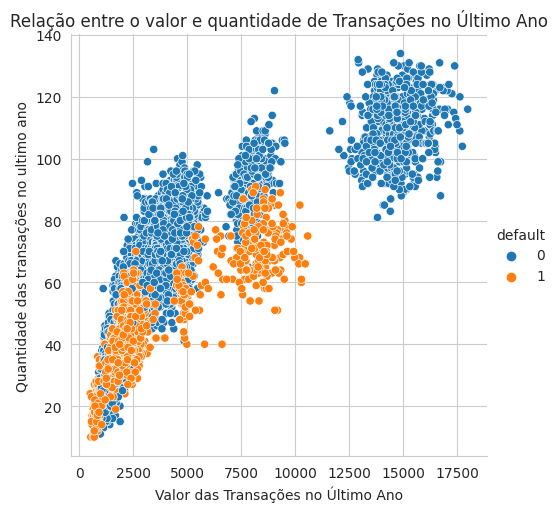

In [53]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=dataset, hue='default')
_ = f.set(
    title='Relação entre o valor e quantidade de Transações no Último Ano',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Quantidade das transações no ultimo ano'
)

## Análise:

Com base nesse gráfico, podemos observar um padrão significativo entre os clientes que realizaram aproximadamente 40 transações no ano, com um valor médio de 2.500,00 reais, e apresentam uma maior probabilidade de se tornarem inadimplentes. Além disso, podemos destacar outros cenários, como clientes que realizaram em torno de 60 transações anuais, com valores entre 7.500,00 e 10.000,00 reais, nos quais não há nenhum grupo de clientes adimplentes.

Também é evidente uma distinção marcante entre os clientes que realizaram mais de 80 transações no ano, com valores acima de 12.500,00 reais. Nesse caso, há apenas concentrações de clientes adimplentes, o que indica um padrão consistente de adimplência.

Portanto, é possível indicar que novos clientes que realizam mais de 80 transações no ano, com valores iguais ou superiores a 12.500,00 reais, provavelmente serão classificados como adimplentes.

No entanto, se um novo cliente se enquadra nos cenários de cerca de 40 transações anuais, com um valor próximo a 2.500,00 reais, ou no cenário de 60 transações anuais, com valores entre 7.500,00 e 10.000,00 reais, existe uma possibilidade de se tornarem inadimplentes. Portanto, é importante agir antecipadamente diante desses cenários, a fim de evitar a inadimplência.